In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/train_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/train_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/test_labels.pkl', 'rb')

In [3]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [4]:
# confirm that these are correct 
len(test_samples) + len(X)

1000

### LSTM 

In [5]:
X[0].shape

(128, 44)

In [6]:
import tensorflow as tf
import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(128, 44), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(2, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128, 64)           27904     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 65,218
Trainable params: 65,218
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=250)

Epoch 1/250
29/29 [==============================] - 32s 17ms/step - loss: 0.6450 - accuracy: 0.7265
Epoch 2/250
29/29 [==============================] - 0s 14ms/step - loss: 0.4416 - accuracy: 0.7868
Epoch 3/250
29/29 [==============================] - 0s 14ms/step - loss: 0.1760 - accuracy: 0.9542
Epoch 4/250
29/29 [==============================] - 0s 14ms/step - loss: 0.1840 - accuracy: 0.9582
Epoch 5/250
29/29 [==============================] - 0s 14ms/step - loss: 0.0778 - accuracy: 0.9828
Epoch 6/250
29/29 [==============================] - 0s 14ms/step - loss: 0.0472 - accuracy: 0.9877
Epoch 7/250
29/29 [==============================] - 0s 14ms/step - loss: 0.1715 - accuracy: 0.9656
Epoch 8/250
29/29 [==============================] - 0s 15ms/step - loss: 0.0618 - accuracy: 0.9838
Epoch 9/250
29/29 [==============================] - 0s 14ms/step - loss: 0.0327 - accuracy: 0.9935
Epoch 10/250
29/29 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.989

In [10]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


In [11]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [12]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

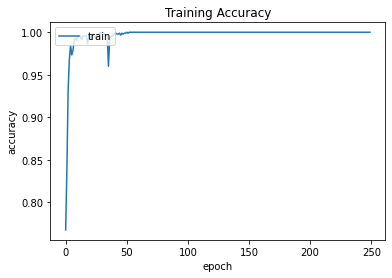

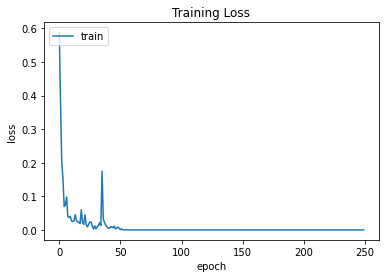

In [13]:
plot_training(history_dict)

In [14]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

4/4 - 1s - loss: 5.9605e-08 - accuracy: 1.0000
Test accuracy: 1.0


In [15]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Test predictions: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [18]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

1.0

In [19]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 100.0%


In [20]:
c = 0
for elem in test_labels:
  if elem == 1:
    c += 1
print(c)

50


Now on the speech samples: 

In [21]:
speech_correct = 0
for i in range(len(test_labels[:249])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [22]:
speech_correct/len(test_labels[:249])

1.0

Wow! 98.7% on the speech samples! 

In [23]:
no_speech_correct = 0
for i in range(len(test_labels[249:])):
    if predictions[i] == test_labels[i]:
      no_speech_correct += 1

In [24]:
print(no_speech_correct/249)

0.0


Same with no speech samples. Looking above, only three wrong for both categories and six wrong total. 

### Confusion matrix and classification report

In [25]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [26]:
cm = confusion_matrix(test_labels, predictions)

In [27]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[50  0]
 [ 0 50]]


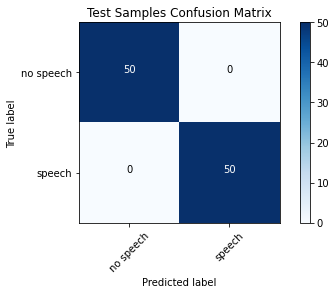

In [28]:
plot_cm(cm, ['no speech','speech'], title='Test Samples Confusion Matrix')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions, target_names=['no speech','speech']))

              precision    recall  f1-score   support

   no speech       1.00      1.00      1.00        50
      speech       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

